In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-87.14680408052739 126.73191309795016
7.547399855256813 -27.738121497704356
88.82834329618868 113.09429224125307
-27.35110335699259 12.640108170417136
-1.8128975838886703 -114.02999431274309
-75.09805055814476 -29.352400954785367
-19.286813509104334 -112.25594541610283
-11.763860789419809 -93.06714812598746
76.9656837953803 -13.002280471860473
-22.778299519727838 49.04164051080721
83.05865463494749 -157.25032049028454
37.80716284551042 76.88108848924179
-8.684804065767409 85.3468516205113
27.019878571266588 144.5865612557251
64.77805260258376 149.58295524164907
77.25800344371277 99.17591286539647
-42.73546308717188 17.14753181431118
-43.001941669952046 -142.24323795717476
-21.191499627308247 79.36155165506591
-81.57856161953711 -24.996285632802227
-37.12406706147613 123.30631901915564
-31.78744250927265 -72.10979779484761
-52.30019957082403 -174.73694624835707
76.91569964094549 -126.54338074831027
-35.97195059987058 95.82451525324899
70.831712188063 33.520835016110254
41.84331441992282

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

580

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | coahuayana
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | farafangana
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | shache
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | zyryanka
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | illapel
Processing Record 21 of Set 1 | vaini
Processing Recor

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,56.91,70,61,3.69,AU,2022-07-25 02:06:42
1,Sao Filipe,14.8961,-24.4956,78.08,83,91,9.95,CV,2022-07-25 02:00:49
2,Saskylakh,71.9167,114.0833,72.90,52,19,10.89,RU,2022-07-25 02:07:35
3,Luderitz,-26.6481,15.1594,67.14,43,0,8.25,NA,2022-07-25 02:07:35
4,Coahuayana,18.7333,-103.6833,79.32,86,93,3.31,MX,2022-07-25 02:07:35
5,Ushuaia,-54.8000,-68.3000,35.26,64,0,3.44,AR,2022-07-25 02:05:33
6,Rikitea,-23.1203,-134.9692,75.45,80,21,15.52,PF,2022-07-25 02:06:45
7,Puerto Ayora,-0.7393,-90.3518,69.55,90,100,8.01,EC,2022-07-25 02:07:36
8,Farafangana,-22.8167,47.8333,63.57,93,12,4.94,MG,2022-07-25 02:07:36
9,Barrow,71.2906,-156.7887,44.62,81,100,11.50,US,2022-07-25 02:07:37


In [42]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-07-25 02:06:42,-42.7826,147.0587,56.91,70,61,3.69
1,Sao Filipe,CV,2022-07-25 02:00:49,14.8961,-24.4956,78.08,83,91,9.95
2,Saskylakh,RU,2022-07-25 02:07:35,71.9167,114.0833,72.90,52,19,10.89
3,Luderitz,NA,2022-07-25 02:07:35,-26.6481,15.1594,67.14,43,0,8.25
4,Coahuayana,MX,2022-07-25 02:07:35,18.7333,-103.6833,79.32,86,93,3.31
5,Ushuaia,AR,2022-07-25 02:05:33,-54.8000,-68.3000,35.26,64,0,3.44
6,Rikitea,PF,2022-07-25 02:06:45,-23.1203,-134.9692,75.45,80,21,15.52
7,Puerto Ayora,EC,2022-07-25 02:07:36,-0.7393,-90.3518,69.55,90,100,8.01
8,Farafangana,MG,2022-07-25 02:07:36,-22.8167,47.8333,63.57,93,12,4.94
9,Barrow,US,2022-07-25 02:07:37,71.2906,-156.7887,44.62,81,100,11.50


In [43]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

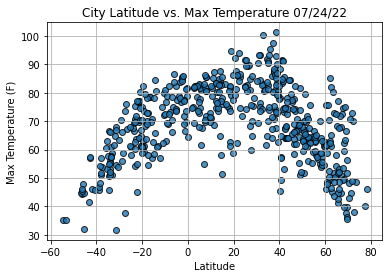

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

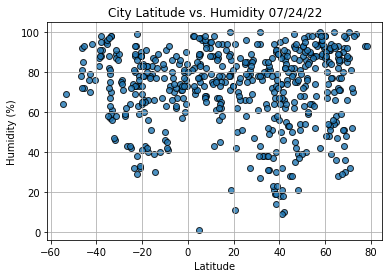

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

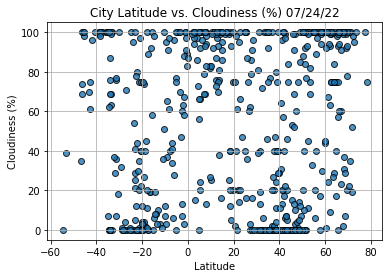

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

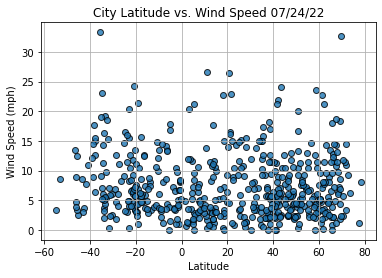

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
index13 = city_data_df.loc[13]
index13

City                     Zyryanka
Country                        RU
Date          2022-07-25 02:07:38
Lat                         65.75
Lng                        150.85
Max Temp                     77.0
Humidity                       28
Cloudiness                     57
Wind Speed                   0.81
Name: 13, dtype: object

In [58]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
529    False
530     True
531     True
532     True
533     True
Name: Lat, Length: 534, dtype: bool

In [59]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sao Filipe,CV,2022-07-25 02:00:49,14.8961,-24.4956,78.08,83,91,9.95
2,Saskylakh,RU,2022-07-25 02:07:35,71.9167,114.0833,72.90,52,19,10.89
4,Coahuayana,MX,2022-07-25 02:07:35,18.7333,-103.6833,79.32,86,93,3.31
9,Barrow,US,2022-07-25 02:07:37,71.2906,-156.7887,44.62,81,100,11.50
10,Shache,CN,2022-07-25 02:07:37,38.4167,77.2406,92.91,14,80,18.16
...,...,...,...,...,...,...,...,...,...
527,Ixtapa,MX,2022-07-25 02:20:56,20.7000,-105.2000,79.23,94,75,4.61
530,Sterling,US,2022-07-25 02:20:57,39.0062,-77.4286,87.12,76,75,5.75
531,Qaqortoq,GL,2022-07-25 02:20:57,60.7167,-46.0333,47.97,80,100,5.14
532,Saint-Donat-De-Montcalm,CA,2022-07-25 02:20:57,46.3187,-74.2219,66.06,99,52,5.97


In [94]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

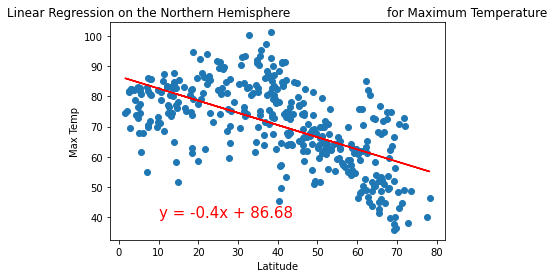

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

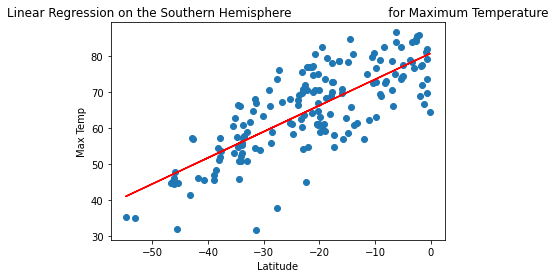

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

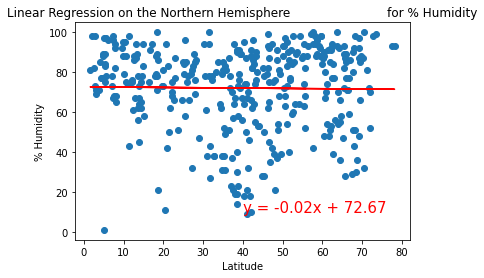

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

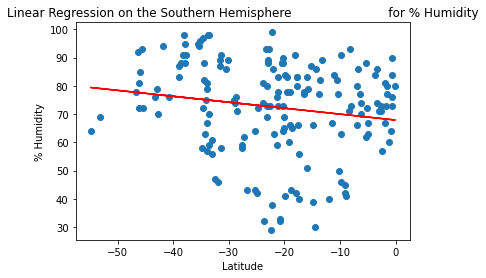

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

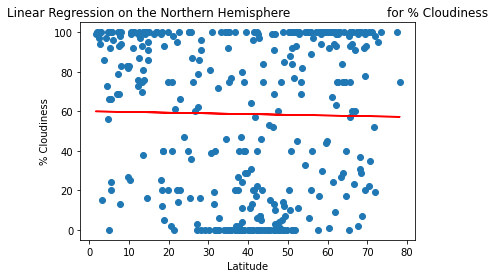

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

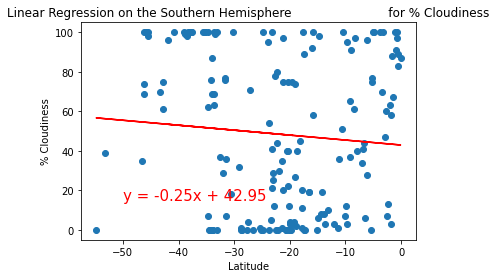

In [104]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

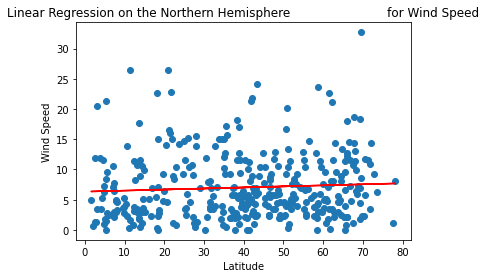

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

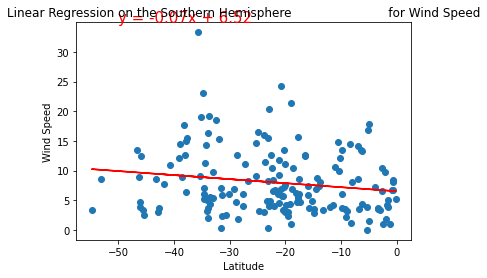

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))